<a href="https://colab.research.google.com/github/weathon/healthy-diet/blob/main/food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from PIL import Image
import pylab

In [12]:
# # Re-download the data.zip, run as needed
# !touch ~/.ssh/known_hosts
# !scp -o PreferredAuthentications="password" -o StrictHostKeyChecking=no wg25r@files.weasoft.com:/mnt/blockstorage/user/data.zip data.zip
# !unzip data.zip
!wget files.weasoft.com:9999/data.zip

--2022-12-31 06:14:12--  http://files.weasoft.com:9999/data.zip
Resolving files.weasoft.com (files.weasoft.com)... 66.42.65.160
Connecting to files.weasoft.com (files.weasoft.com)|66.42.65.160|:9999... connected.
HTTP request sent, awaiting response... 200 OK
Length: 789758096 (753M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>] 753.17M  14.1MB/s    in 57s     

2022-12-31 06:15:10 (13.2 MB/s) - ‘data.zip’ saved [789758096/789758096]



In [ ]:
!unzip data.zip


### Load Data

In [92]:
X = []
Y = []
df = np.array(pd.read_csv("train_img.csv"))
for i in df:
    X.append(np.array(Image.open(f"train_images/train_images/{i[0]}").resize((128,128))))
    Y.append(i[1])

In [93]:
Y_mapping = {}
l = 0
for i in range(len(Y)):
    try:
        tmp = Y_mapping[Y[i]]
        Y[i] = tmp
    except:
        Y_mapping[Y[i]] = l
        Y[i] = l
        l+=1

In [94]:
for i in range(len(Y)):
    tmp = np.zeros_like([0]*(l+1))
    tmp[Y[i]] = 1
    Y[i] = tmp

### Model

In [106]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128,128,3)),
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    # tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    # tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    # tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
    # tf.keras.layers.Conv2D(128,(3,3),activation="relu"), works much better without these layers 
    tf.keras.layers.MaxPooling2D(),
    # tf.keras.layers.Conv2D(128,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(4096, activation="relu"),
    # tf.keras.layers.Dense(2048, activation="relu"),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(len(Y_mapping.keys())+1, activation="relu"),
    tf.keras.layers.Dense(len(Y_mapping.keys())+1, activation="softmax")
])

In [ ]:
model.summary()

In [107]:
X = np.array(X)
Y = np.array(Y)
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics="accuracy")

In [ ]:
random = np.arange(len(Y)) 
np.random.shuffle(random)
X = X[random]
Y = Y[random]
history = model.fit(X, Y, epochs=30, validation_split=0.1)

Epoch 1/30
263/263 [==============================] - 6s 20ms/step - loss: 9.2111 - accuracy: 0.0992 - val_loss: 3.7776 - val_accuracy: 0.0943
Epoch 2/30
263/263 [==============================] - 5s 20ms/step - loss: 3.6439 - accuracy: 0.1343 - val_loss: 3.6591 - val_accuracy: 0.1200
Epoch 3/30
263/263 [==============================] - 5s 19ms/step - loss: 3.2967 - accuracy: 0.2037 - val_loss: 3.7052 - val_accuracy: 0.1436
Epoch 4/30
263/263 [==============================] - 5s 20ms/step - loss: 2.7346 - accuracy: 0.3116 - val_loss: 3.9892 - val_accuracy: 0.1543
Epoch 5/30
263/263 [==============================] - 5s 19ms/step - loss: 2.1125 - accuracy: 0.4539 - val_loss: 4.4073 - val_accuracy: 0.1350
Epoch 6/30
263/263 [==============================] - 5s 19ms/step - loss: 1.5640 - accuracy: 0.5888 - val_loss: 5.5586 - val_accuracy: 0.1136
Epoch 7/30
263/263 [==============================] - 5s 19ms/step - loss: 1.1539 - accuracy: 0.7030 - val_loss: 5.9291 - val_accuracy: 0.1340

In [68]:
model.save("model_2.h5")

In [69]:
!ls -l -h model_2.h5

-rw-r--r-- 1 root root 1.2G Dec 31 07:16 model_2.h5


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [70]:
!cp model_2.h5 drive/MyDrive/FoodMode_2.h5

In [38]:
reverseMap = {}
for i in Y_mapping.keys():
  reverseMap[Y_mapping[i]] = i

1/1 [==============================] - 0s 18ms/step
bread-white


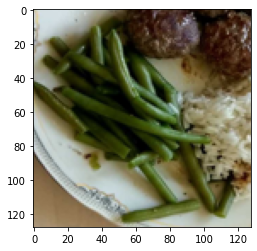

In [78]:
id = 29
image = os.listdir("test_images/test_images/")[id]
print(reverseMap[np.argmax(model.predict(np.array([
    np.array(Image.open("test_images/test_images/"+image).resize((128,128)))
    ]))[0][:-1])])#aaput kes in predict
pylab.imshow(Image.open("test_images/test_images/"+image).resize((128,128)))


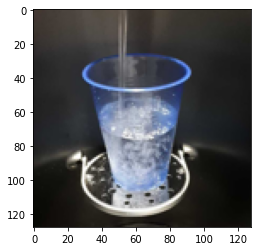